In [1]:
import sys
sys.path.insert(0, "../..")

In [2]:
import numpy as np
import torch
from torchvision.datasets import MNIST

from logistic_regression import LogisticRegression
from extrapolation import *
from experiments import Experiment

## 0 vs 1

In [2]:
ds_train = MNIST("../MNIST", download=True, train=True)
ds_test = MNIST("../MNIST", download=True, train=False)

m_train = np.isin(ds_train.targets.numpy(), [0, 1])
X_train = ds_train.data[m_train].view(-1, 28*28).double()
y_train = torch.where(ds_train.targets[m_train] == 1, 1, -1)

m_test = np.isin(ds_test.targets.numpy(), [0, 1])
X_test = ds_test.data[m_test].view(-1, 28*28).double()
y_test = torch.where(ds_test.targets[m_test] == 1, 1, -1)

In [3]:
y_train.unique(return_counts=True)

(tensor([-1,  1]), tensor([5923, 6742]))

In [4]:
model = LogisticRegression(X_train, y_train, 1e2)

In [5]:
model.fit(1e-6, max_iter=200500)

In [6]:
len(model.log)

418

In [7]:
preds = model.predict(X_test)
torch.mean((preds == y_test).double())

tensor(0.9991, dtype=torch.float64)

## 3 vs 8

In [3]:
ds_train = MNIST("../MNIST", download=True, train=True)
ds_test = MNIST("../MNIST", download=True, train=False)

m_train = np.isin(ds_train.targets.numpy(), [3, 8])
X_train = ds_train.data[m_train].view(-1, 28*28).double()
y_train = torch.where(ds_train.targets[m_train] == 8, 1, -1)

m_test = np.isin(ds_test.targets.numpy(), [3, 8])
X_test = ds_test.data[m_test].view(-1, 28*28).double()
y_test = torch.where(ds_test.targets[m_test] == 8, 1, -1)

In [4]:
y_train.unique(return_counts=True)

(tensor([-1,  1]), tensor([6131, 5851]))

In [5]:
X_train = X_train.cuda()
y_train = y_train.cuda()
X_test = X_test.cuda()
y_test = y_test.cuda()

In [6]:
model = LogisticRegression(X_train, y_train, 1e2, device="cuda")

In [7]:
model.fit(1e-8, max_iter=200500)

KeyboardInterrupt: 

In [ ]:
len(model.log)

In [ ]:
preds = model.predict(X_test)
torch.mean((preds == y_test).double())

In [10]:
experiment = Experiment(model.log, model.obj, 5, values=model.value_log)

In [4]:
model = LogisticRegression(X_train, y_train, 1e2, device="cpu")
experiment = Experiment([], model.obj, 5)
experiment.load("mnist_1e2.p")

In [5]:
n = 50000

In [6]:
experiment.run_method("RRE+QR", RRE, n, {"qr": True})

In [7]:
experiment.run_method("RNA", RNA, n, {"lambda_range": (1e-15, 1e-2), "linesearch": False, "normalize": False})

In [8]:
experiment.run_method("RNA+norm", RNA, n, {"lambda_range": (1e-15, 1e-2), "linesearch": False})

In [9]:
experiment.run_method("RNA+ls", RNA, n, {"lambda_range": (1e-15, 1e-2), "linesearch": True})

In [10]:
experiment.run_method("RNA+Cholesky", RNA_cholesky, n, {"lambda_range": (1e-40, 1e-5), "linesearch": False})

In [11]:
# experiment.save("mnist_1e2.p")

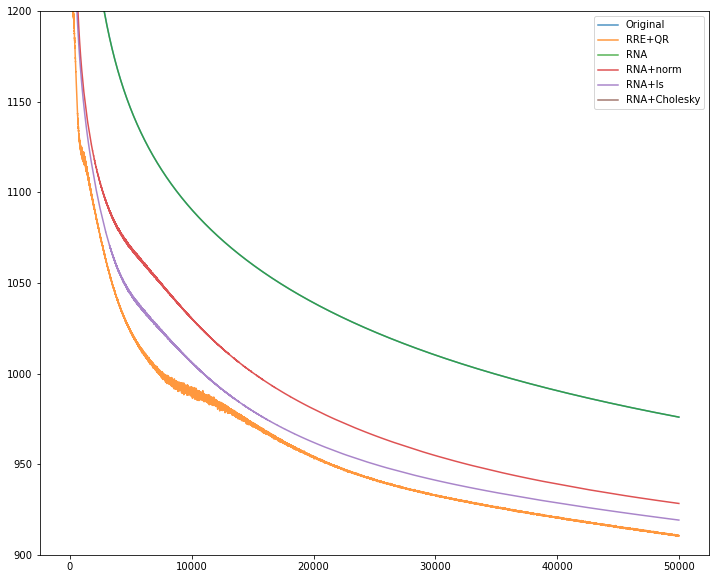

In [5]:
experiment.plot_values(n=49993, figsize=(12, 10), ylim=(900, 1200))

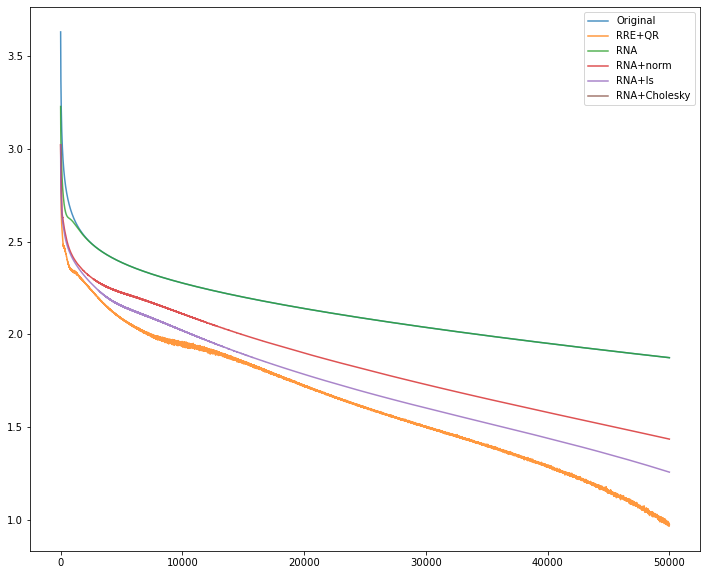

In [9]:
experiment.plot_log_diff(n=49993, figsize=(12, 10), vs_original=True)